### Abstract

In this lab is presented a simple method for calibration of optical images from CCDs. This method consists of creating a masterbias and masterflat images, and apply them to the science image. By doing so, we can retrieve a calibrated science image ready to be used. This simple method does not cover all the aspects of calibration (such as fringing patterns, cosmic rays, pixel cross-talk, and others), which leads to big differences with the actual science-ready image from the NOAO archive. 

### Introduction

The goal of this lab to teach students about real science data and the ways of accessing them from archives as well as how to conduct simple reudction processes on those images. We useddata from the National Optical Astronomy Observatory (NOAO) archive (www.noao.edu), which led to a set of images made with the MOSAIC CCD imaging camera. These images contained bias and flats frames and also an uncalibrated (raw) science image and an NOAO pipeline-processed science ready image. With the bias, a master bias image is created as the average count level in each pixel of the CCD. This allow us to remove the bias effects in the science image. With the flat frames, we create a master flat image, which allows to quantify the response to light of CCD across its detection area. Finally, after having those two calibration images, we can apply them to the uncalibrated science image and create a calibrated image which can be compared to the NOAO science-ready image.

### Dataset

You can dowload all the data from the following link http://astro.puc.cl/~rmunoz/data/data_science_2015/image_processing_lecture_1.zip

### 1. Let's compute the master bias

In [1]:
import math as m
import numpy as np
from pylab import *
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
inline_rc = dict(mpl.rcParams)

In [2]:
nx = 2048
ny = 4096
#root = '/u/home/christoq/Classes/Astro361/Fall2014/LabData/CCDLabData_part2/focal_plane/'
root = 'data/'
root_end = '.fits.fz'

bias_array = np.zeros((ny,nx,10),dtype='uint64')
for i in range(0,10):
  filename = root + 'zero_' + str(i) + root_end
  bias_array[:,:,i] =  fits.getdata(filename,1)[:,64:2112]


In [4]:
master_bias = np.mean(bias_array.astype(dtype='float32'),axis=2)
master_bias_std = np.std(bias_array.astype(dtype='float32'),axis=2)

In [5]:
print 'Master bias - shape: ', master_bias.shape
print 'StdDev Master bias - shape: ', master_bias_std.shape
print
print 'Master bias - median: ', "{:.2f}".format(np.median(master_bias))
print 'StdDev Master bias - median: ', "{:.2f}".format(np.median(master_bias_std))

Master bias - shape:  (4096, 2048)
StdDev Master bias - shape:  (4096, 2048)

Master bias - median:  2477.40
StdDev Master bias - median:  2.33


In [6]:
print 'Master bias data:\n', master_bias
print
print 'StdDev Master bias data:\n', master_bias_std

Master bias data:
[[ 2488.39990234  2477.89990234  2476.60009766 ...,  2480.60009766
   2480.30004883  2481.        ]
 [ 2489.60009766  2477.80004883  2478.69995117 ...,  2480.60009766
   2481.39990234  2481.60009766]
 [ 2490.19995117  2479.30004883  2477.80004883 ...,  2481.10009766
   2480.39990234  2481.60009766]
 ..., 
 [ 2487.89990234  2477.60009766  2477.10009766 ...,  2480.80004883
   2480.89990234  2480.80004883]
 [ 2488.5         2478.39990234  2476.89990234 ...,  2481.5         2481.10009766
   2482.39990234]
 [ 2488.89990234  2478.5         2477.60009766 ...,  2480.89990234
   2481.30004883  2481.19995117]]

StdDev Master bias data:
[[ 2.65329981  2.66270518  1.9078784  ...,  2.2891047   2.28254247
   2.09761763]
 [ 2.10713077  1.60000002  2.05182838 ...,  3.29241538  3.41174436
   2.15406609]
 [ 2.71293187  3.06757212  3.09192491 ...,  1.04403067  2.2449944
   3.07245827]
 ..., 
 [ 2.80891418  2.83548927  2.87923574 ...,  1.72046506  1.44568312
   2.44131112]
 [ 2.10950232 

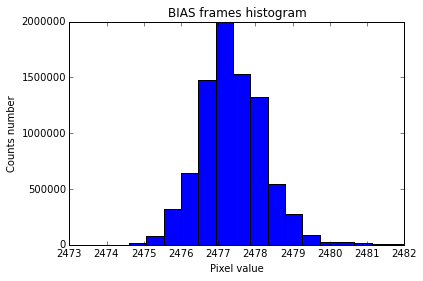

In [7]:
plt.hist(np.ndarray.flatten(master_bias), bins=30, range=2477.40 + 3*2.33*np.asarray((-1,1)))
plt.xlim( np.round(2477.4 + 2*2.3*np.asarray((-1,1))))
plt.ticklabel_format(useOffset=False)
plt.title('BIAS frames histogram')
plt.xlabel('Pixel value')
plt.ylabel('Counts number')

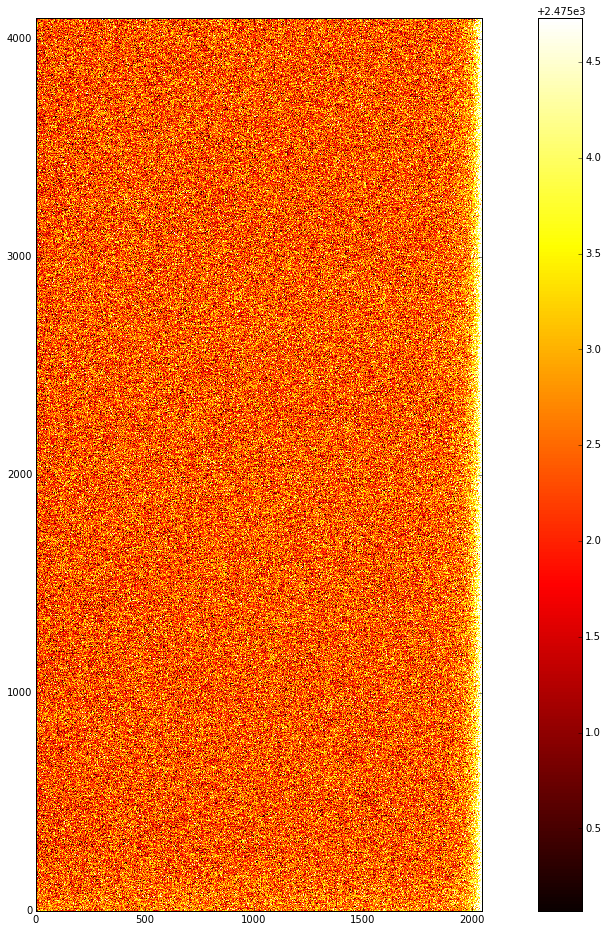

In [8]:
matplotlib.rcParams['figure.figsize'] = (20, 16)
fig, ax = plt.subplots()
im = ax.imshow(master_bias,cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',
               vmin=2477.40-2.33, vmax=2477.40+2.33)
fig.colorbar(im)
plt.show()
matplotlib.rcParams.update(inline_rc)

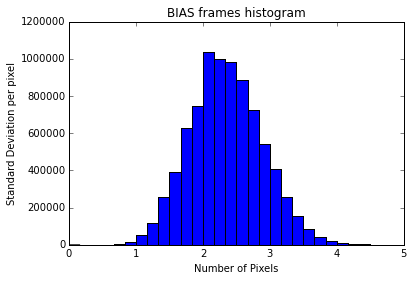

In [8]:
plt.hist(np.ndarray.flatten(master_bias_std), bins=30, range=(0,5))
plt.title('BIAS frames histogram')
plt.xlabel('Number of Pixels')
plt.ylabel('Standard Deviation per pixel')

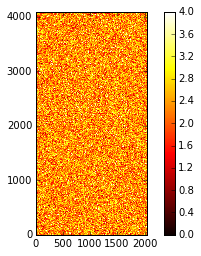

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(master_bias_std,cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',
               vmin=0, vmax=4)
fig.colorbar(im)
plt.show()

In [9]:
fits.writeto(root + 'master_bias_lab.fits', master_bias,clobber=True)

### 2. Let's compute the master flat

In [10]:
flat_array = np.zeros((ny,nx,10),dtype='uint64')
for i in range(0,10):
  filename = root + 'flat_' + str(i+1) + root_end
  flat_array[:,:,i] =  fits.getdata(filename,1)[:,64:2112]

In [11]:
flat_calib_array=np.zeros((ny,nx,10),dtype='uint64')
for i in range(0,10):
    flat_calib_array[:,:,i] = (flat_array[:,:,i]-master_bias)

In [12]:
master_flat = np.mean(flat_calib_array.astype(dtype='float32'),axis=2)
master_flat_std = np.std(flat_calib_array.astype(dtype='float32'),axis=2)

In [14]:
print 'Master flat - shape: ', master_flat.shape
print 'StdDev Master flat - shape: ', master_flat_std.shape
print
print 'Master flat - median: ', "{:.2f}".format(np.median(master_flat))
print 'StdDev Master flat - median: ', "{:.2f}".format(np.median(master_flat_std))

Master flat - shape:  (4096, 2048)
StdDev Master flat - shape:  (4096, 2048)

Master flat - median:  8090.60
StdDev Master flat - median:  360.36


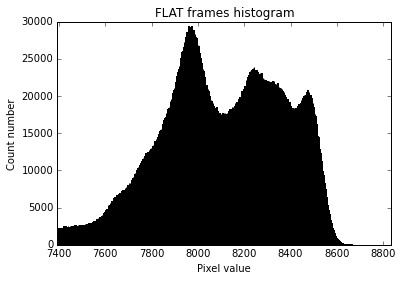

In [15]:
plt.hist(np.ndarray.flatten(master_flat), bins=1000, range=8112.50 + 3*361.58*np.asarray((-1,1)))
plt.xlim( np.round(8112.50 + 2*361.58*np.asarray((-1,1))))
plt.ticklabel_format(useOffset=False)
plt.title('FLAT frames histogram')
plt.xlabel('Pixel value')
plt.ylabel('Count number')

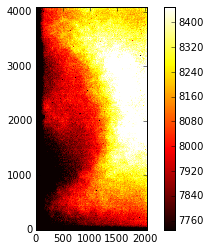

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(master_flat,cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',
               vmin=8090.60-360.36, vmax=8090.60+360.36)
fig.colorbar(im)
plt.show()

The masterflat can be expressed in pixel values. But it is most often used to normalize an image. Therefore, we divide by the mean of the entire image to create a new masterflat with values that hover around 1. Parts of the CCD lower than one need to be raised up and parts higher than need to be lowered by the appropriate fraction of light in the normalized masterflat.

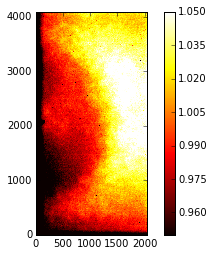

In [18]:
master_flat_norm = master_flat/np.mean(master_flat[(master_flat > 1800) & (master_flat < 13500)])
fig, ax = plt.subplots()
im = ax.imshow(master_flat_norm,cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',
               vmin=0.95, vmax=1.05)
fig.colorbar(im)
plt.show()

In [19]:
fits.writeto(root + 'master_flat_lab.fits', master_flat_norm,clobber=True)

### 3. Let's compare with the NOAO dome flat

In [20]:
filename = root + 'master_dome_noao' + root_end
master_flat_noao = fits.getdata(filename,1)

In [21]:
print 'Master flat NOAO - shape: ', master_flat_noao.shape
print
print 'Master flat NOAO - median: ', "{:.2f}".format(np.median(master_flat_noao))
print 'Master flat NOAO - stddev: ', "{:.2f}".format(np.std(master_flat_noao))

Master flat NOAO - shape:  (4096, 2048)

Master flat NOAO - median:  8076.04
Master flat NOAO - stddev:  321.72


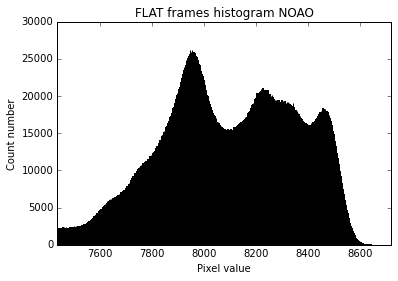

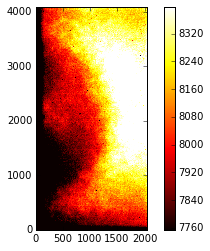

In [22]:
plt.hist(np.ndarray.flatten(master_flat_noao), bins=1000, range=8076.04 + 3*321.72*np.asarray((-1,1)))
plt.xlim( np.round(8076.04 + 2*321.72*np.asarray((-1,1))))
plt.ticklabel_format(useOffset=False)
plt.title('FLAT frames histogram NOAO')
plt.xlabel('Pixel value')
plt.ylabel('Count number')

fig, ax = plt.subplots()
im = ax.imshow(master_flat_noao,cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',
               vmin=8076.04-321.72, vmax=8076.04+321.72)
fig.colorbar(im)
plt.show()

This above is the NOAO master dome flat. How does it compare to our own?

### 4. Let's open a raw science image and process it using the master bias and master flat we computed

In [23]:
filename = root + 'science_raw' + root_end
image = fits.open(filename)
im_h = image[0].header
im_data = image[1].data[:,64:2112]

print 'Science image - median: ', "{:.2f}".format(np.median(im_data))
print 'Science image - stddev: ', "{:.2f}".format(np.std(im_data))
print 'Low percentile: ', "{:.2f}".format(np.percentile(im_data, 0.25))
print 'High percentile: ', "{:.2f}".format(np.percentile(im_data, 99.5))

Science image - median:  4488.00
Science image - stddev:  2062.84
Low percentile:  4072.00
High percentile:  7011.00


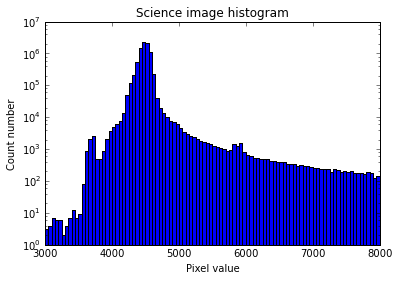

In [26]:
plt.hist(np.ndarray.flatten(im_data), bins=100, range=(3000.,8000.))
plt.xlim(3000.,8000.)
plt.ticklabel_format(useOffset=False)
plt.yscale('log')
plt.title('Science image histogram')
plt.xlabel('Pixel value')
plt.ylabel('Count number')

In [27]:
print 'Science image - median: ', "{:.2f}".format(np.median(im_data))
print 'Science image - stddev: ', "{:.2f}".format(np.std(im_data[(im_data>3000) & (im_data<5000)]))

Science image - median:  4488.00
Science image - stddev:  85.43


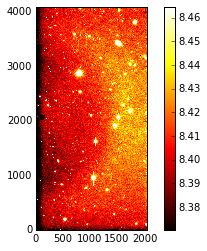

In [30]:
fig, ax = plt.subplots()
im = ax.imshow(np.log(im_data),cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',
               vmin=np.log(4488.00-2*85.43), vmax=np.log(4488.00+3*85.43))
fig.colorbar(im)
plt.show()

### The first calibration we apply is related to the master bias. Should we subtract or divide?

In [31]:
im_data_calib=im_data-master_bias
print 'Science image - median: ', "{:.2f}".format(np.median(im_data_calib))
print 'Science image - stddev: ', "{:.2f}".format(np.std(im_data_calib))
print 'Low percentile: ', "{:.2f}".format(np.percentile(im_data_calib, 0.25))
print 'High percentile: ', "{:.2f}".format(np.percentile(im_data_calib, 99.5))

Science image - median:  2010.70
Science image - stddev:  2062.85
Low percentile:  1593.50
High percentile:  4534.20


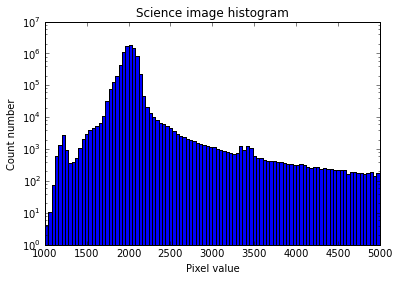

In [32]:
plt.hist(np.ndarray.flatten(im_data_calib), bins=100, range=(1000.,5000.))
plt.xlim(1000.,5000.)
plt.ticklabel_format(useOffset=False)
plt.yscale('log')
plt.title('Science image histogram')
plt.xlabel('Pixel value')
plt.ylabel('Count number')

In [33]:
print 'Science image - median: ', "{:.2f}".format(np.median(im_data_calib))
print 'Science image - stddev: ', "{:.2f}".format(np.std(im_data_calib[(im_data_calib>1000) & (im_data_calib<3000)]))

Science image - median:  2010.70
Science image - stddev:  93.61


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from IPython.kernel.zmq import kernelapp as app


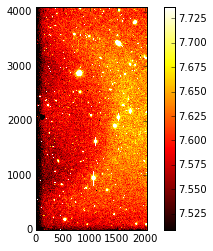

In [34]:
fig, ax = plt.subplots()
im = ax.imshow(np.log(im_data_calib),cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',
               vmin=np.log(2010.70-2*93.61), vmax=np.log(2010.70+3*93.61))
fig.colorbar(im)
plt.show()

### The second calibration we apply is related to the dome flat. Should we subtract or divide?

In [35]:
im_data_calib = ((im_data.astype(dtype='float64')-master_bias)/master_flat_norm)
gv=np.isfinite(im_data_calib)
print 'Science image - shape: ', im_data_calib.shape
print 'Science image - median: ', "{:.2f}".format(np.median(im_data_calib[gv]))
print 'Science image - stddev: ', "{:.2f}".format(np.std(im_data_calib[gv]))
print 'Low percentile: ', "{:.2f}".format(np.percentile(im_data_calib[gv], 0.25))
print 'High percentile: ', "{:.2f}".format(np.percentile(im_data_calib[gv], 99.5))

Science image - shape:  (4096, 2048)
Science image - median:  2002.58
Science image - stddev:  2054.70
Low percentile:  1912.60
High percentile:  4512.03


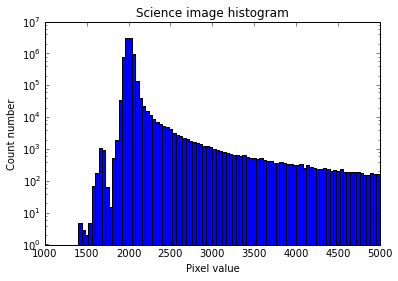

In [36]:
plt.hist(np.ndarray.flatten(im_data_calib), bins=100, range=(1000.,5000.))
plt.xlim(1000.,5000.)
plt.ticklabel_format(useOffset=False)
plt.yscale('log')
plt.title('Science image histogram')
plt.xlabel('Pixel value')
plt.ylabel('Count number')

In [37]:
print 'Science image - median: ', "{:.2f}".format(np.median(im_data_calib))
print 'Science image - stddev: ', "{:.2f}".format(np.std(im_data_calib[(im_data_calib>1500) & (im_data_calib<3000)]))

Science image - median:  2002.58
Science image - stddev:  59.87


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


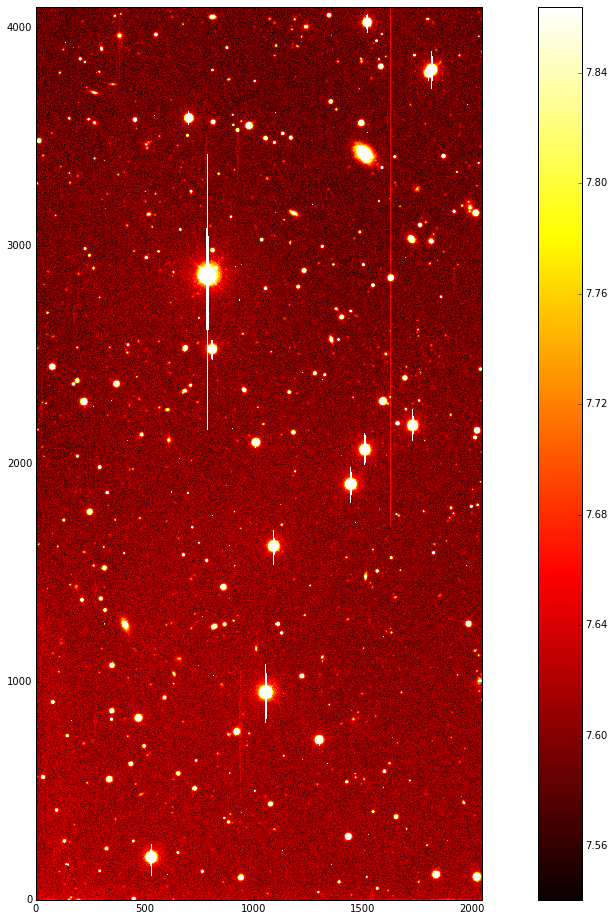

In [38]:
matplotlib.rcParams['figure.figsize'] = (20.0, 16.0)
fig, ax = plt.subplots()
im = ax.imshow(np.log(im_data_calib),cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',
               vmin=np.log(2002.58-2*59.87), vmax=np.log(2002.58+10*59.88))
fig.colorbar(im)
plt.show()
matplotlib.rcParams.update(inline_rc)

In [39]:
hdu = fits.PrimaryHDU(im_data_calib)
fits.writeto(root + 'science_reduced_lab.fits', im_data_calib, header=im_h,clobber=True)

Notice how much flatter the "flattened" image is compared to the original. Now let us compare to the NOAO science ready image.

Note: Recent work on DECam has show that DOME flat corrections actually add noise and features to images. There are better ways to "calibrate" an astromical image, even though using dome flats is a common procedure still used by many astronomers.

### 5. Let's open the NOAO science reduced image

In [3]:
filename = root + 'science_instcal_noao' + root_end
image = fits.open(filename)
im_h_noao = image[0].header
im_data_noao = image[1].data

In [4]:
print 'Science image - median: ', "{:.2f}".format(np.median(im_data_noao))
print 'Science image - stddev: ', "{:.2f}".format(np.std(im_data_noao))
print 'Low percentile: ', "{:.2f}".format(np.percentile(im_data_noao, 0.25))
print 'High percentile: ', "{:.2f}".format(np.percentile(im_data_noao, 99.5))

Science image - median:  10.76
Science image - stddev:  1.94
Low percentile:  10.35
High percentile:  16.16


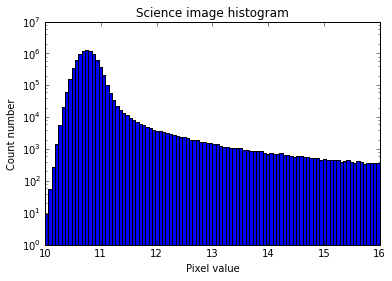

In [5]:
plt.hist(np.ndarray.flatten(im_data_noao), bins=100, range=(10.,16.))
plt.xlim(10.,16.)
plt.ticklabel_format(useOffset=False)
plt.yscale('log')
plt.title('Science image histogram')
plt.xlabel('Pixel value')
plt.ylabel('Count number')

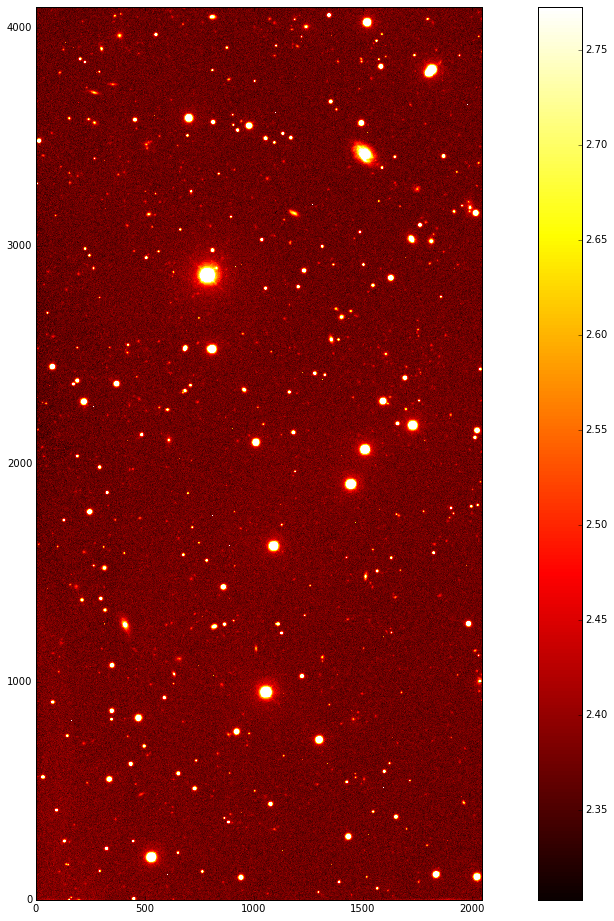

In [6]:
matplotlib.rcParams['figure.figsize'] = (20.0, 16.0)
fig, ax = plt.subplots()
im = ax.imshow(np.log(im_data_noao),cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',
               vmin=np.log(10.), vmax=np.log(16.))
fig.colorbar(im)
plt.show()
matplotlib.rcParams.update(inline_rc)

Note that the NOAO Science Ready image is flatter and ALSO that the cosmic rays have been removed, as well as bad pixel columns. How would you remove cosmic rays? This image is also calibrated with a sky flat as described in the NOAO handbook. Why are the pixel values in the NOAO image so low? Note: You can download the sky flat for this image and apply it to your flattened image as well. But question: do you divide it out? or subtract it out?

In the next lab, we will find and then characterize the stars in this image. Question: how do we figure out where these stars are on the sky (i.e., their coordinates fixed to the celestial sphere)?

### Revision history
-Written by Chris Miller (Astronomy Department, University of Michigan)

-Modified by Roberto Muñoz (Institute of Astrophysics, Pontificia Universidad Catolica de Chile)

In [39]:
# Below is a note to myself about switching to ASINH scaling (as opposed to log)
#limg = np.arcsinh(imgsci_cal)
#limg = limg / limg.max()
#low = np.percentile(limg, 0.25)
#high = np.percentile(limg, 99.5)
